Centrality Measures

In [1]:
import yfinance
import pandas as pd
import networkx as nx

from stock_graph_creation import correlation_to_graph
from stock_graph_creation import get_sp500_stocks
from stock_graph_creation import get_sp500_stocks_info
from utils import rolling_time_windows

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'graph_tool', 'bayanpy', 'wurlitzer', 'leidenalg'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer', 'leidenalg'}


In [ ]:
correlations = get_sp500_stocks_info(start_date="2025-02-01", end_date="2025-03-01").corr()
correlations

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2025-02-01 -> 2025-03-01)')
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Ticker,,,,,,,,,,,,,,,,,,,,,
A,1.000000,-0.735000,-0.833110,-0.563467,-0.794366,0.481330,0.727373,-0.232722,-0.640757,-0.138784,...,-0.495697,0.498906,-0.635314,-0.834604,-0.561103,-0.135193,-0.861043,0.136538,0.925303,0.611403
AAPL,-0.735000,1.000000,0.693073,0.773314,0.581884,-0.701877,-0.419621,0.389591,0.818008,0.247844,...,0.163899,-0.577429,0.800678,0.720770,0.553206,0.037150,0.629476,0.067595,-0.853528,-0.775408
ABBV,-0.833110,0.693073,1.000000,0.316968,0.920871,-0.217254,-0.899319,-0.179891,0.825675,0.458422,...,0.743179,-0.162616,0.747704,0.961935,0.656825,-0.035122,0.761042,0.280750,-0.806962,-0.434637
ABNB,-0.563467,0.773314,0.316968,1.000000,0.182838,-0.785989,-0.051351,0.636026,0.589713,-0.093951,...,-0.095992,-0.738425,0.694419,0.339716,0.393462,0.143515,0.485548,-0.261778,-0.673802,-0.930082
ABT,-0.794366,0.581884,0.920871,0.182838,1.000000,-0.213923,-0.856907,-0.155160,0.722172,0.411646,...,0.676812,-0.174754,0.590617,0.908716,0.680328,0.019072,0.720521,0.244858,-0.761364,-0.295705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XYL,-0.135193,0.037150,-0.035122,0.143515,0.019072,-0.063505,0.179326,0.296302,-0.096675,-0.770851,...,-0.259392,-0.397802,-0.226396,-0.148917,0.346934,1.000000,0.349319,-0.626526,-0.097568,-0.007289
YUM,-0.861043,0.629476,0.761042,0.485548,0.720521,-0.436250,-0.681506,0.218247,0.602022,0.004250,...,0.494192,-0.445503,0.481743,0.665124,0.580533,0.349319,1.000000,-0.352047,-0.883101,-0.478673
ZBH,0.136538,0.067595,0.280750,-0.261778,0.244858,0.361768,-0.282793,-0.620714,0.327589,0.754120,...,0.397269,0.502822,0.406760,0.366773,0.053599,-0.626526,-0.352047,1.000000,0.126961,0.081900


In [ ]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Number of connected components: {nx.number_connected_components(G)}")


Number of nodes: 503
Number of edges: 25996
Number of connected components: 12


In [11]:
G = correlation_to_graph(correlations, threshold=0.7)
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
closeness_centrality = nx.closeness_centrality(G)
# pagerank = nx.pagerank(G, weight='weight',max_iter=1000000)

centrality_df = pd.DataFrame({
    "Degree": degree_centrality,
    "Betweenness": betweenness_centrality,
    "Closeness": closeness_centrality
    #"PageRank": pagerank
})

centrality_df_sorted = centrality_df.sort_values(by="Betweenness", ascending=False)

print("\n Top 10 titols by Betweenness:")
print(centrality_df_sorted.head(10))



 Top 10 titols by Betweenness:
        Degree  Betweenness  Closeness
ALGN  0.454183     0.924207   0.575286
KMB   0.444223     0.922331   0.574592
BLDR  0.438247     0.920653   0.570463
HSY   0.444223     0.918752   0.575286
AMZN  0.448207     0.917249   0.571833
LNT   0.444223     0.915850   0.570463
ZBRA  0.424303     0.907798   0.567067
KO    0.418327     0.906287   0.561056
DECK  0.446215     0.906084   0.574592
T     0.444223     0.905058   0.572520


Betwenness centrality allows us to identify the most important nodes in a network. It is a measure of the number of times a node acts as a bridge along the shortest path between two other nodes. In the context of stock correlations, it can help identify stocks that are key players in the network, potentially influencing the behavior of other stocks.
This implies that this titols can weel reflect broad market movements, since they are sensitive to or influential to very different sectors.
Stocks with high betweenness can be useful for monitoring market shifts.
If such a stock starts to diverge in performance, it might indicate broader instability or trend changes in the network.
These "connector" stocks can be seen as systemic risk indicators or diversifiers and watching betweenness leaders over time might help detect shifts in market structure.
The project idea is to try to monitor such metrics in order to see if there's some patterns during crises such as wars or pandemies.

CRISIS ANALYSIS:

In a crisis, it's often observable:

    - Higher correlations across the board (markets move together)
    
    - More densely connected graphs

    - Certain nodes (stocks) becoming disproportionately central (systemic importance)

    - Collapse of clear community/sector structures



In [2]:
from utils import compute_centralities_over_time
from utils import plot_centrality

In [3]:
df = get_sp500_stocks("2024-12-01", "2025-03-31")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  502 of 502 completed

2 Failed downloads:
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-12-01 -> 2025-03-31)')
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')


In [4]:
windows = rolling_time_windows("2024-12-01", "2025-03-31", window_size_days=15, step_days=7)
centrality_df = compute_centralities_over_time(df, windows, threshold=0.7)

KeyboardInterrupt: 

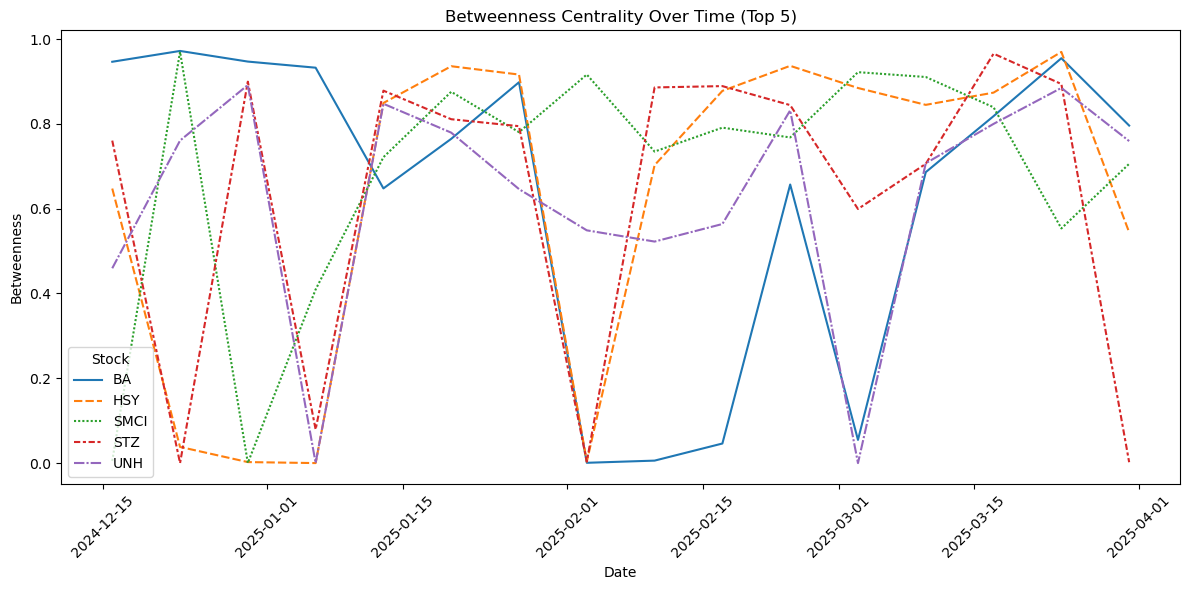

In [5]:
plot_centrality(centrality_df, centrality_type="Betweenness", top_k=5)

Stock Market during COVID-19 pandemic

In [ ]:
df_covid = get_sp500_stocks("2020-01-01", "2020-06-01")
windows = rolling_time_windows("2020-01-01", "2020-06-01", window_size_days=15, step_days=7)
centrality_df_covid = compute_centralities_over_time(df_covid, windows, threshold=0.7)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  502 of 502 completed

13 Failed downloads:
['GEV', 'PLTR', 'EXE', 'VLTO', 'DASH', 'GEHC', 'KVUE', 'SOLV', 'ABNB', 'SW', 'CEG']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-01 -> 2020-06-01) (Yahoo error = "Data doesn\'t exist for startDate = 1577854800, endDate = 1590984000")')
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-01 -> 2020-06-01)')


In [ ]:
print(centrality_df_covid)

          Date   Density  Avg_Degree  Clustering  Num_Components  \
0   2020-01-16  0.032517   16.290837    0.337409              17   
1   2020-01-23  0.027896   13.976096    0.292935              17   
2   2020-01-30  0.056699   28.406375    0.361914              18   
3   2020-02-06  0.052803   26.454183    0.391319              20   
4   2020-02-13  0.041065   20.573705    0.358429              18   
5   2020-02-20  0.026107   13.079681    0.298149              17   
6   2020-02-27  0.206829  103.621514    0.581240              19   
7   2020-03-05  0.325230  162.940239    0.674120              18   
8   2020-03-12  0.188317   94.346614    0.561987              16   
9   2020-03-19  0.079315   39.737052    0.450121              21   
10  2020-03-26  0.095848   48.019920    0.452133              18   
11  2020-04-02  0.109534   54.876494    0.484537              15   
12  2020-04-09  0.125629   62.940239    0.492691              19   
13  2020-04-16  0.142027   71.155378    0.507720

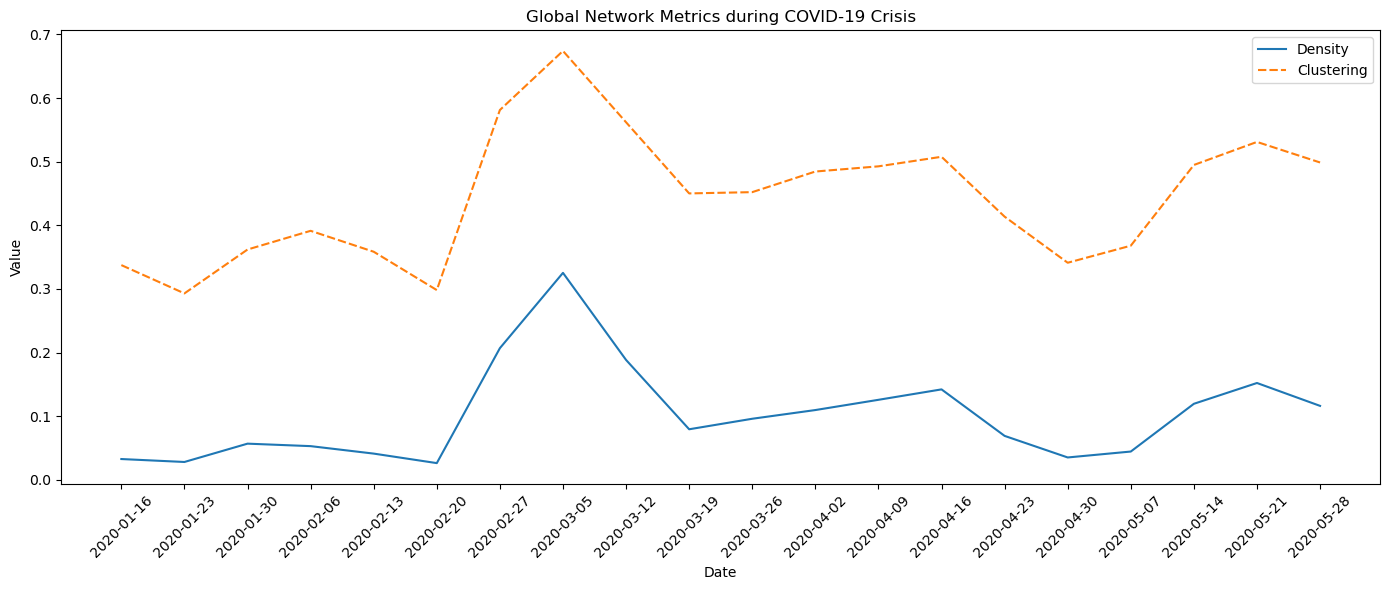

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.lineplot(data=centrality_df_covid.set_index("Date")[["Density", "Clustering"]])
plt.title("Global Network Metrics during COVID-19 Crisis") 
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

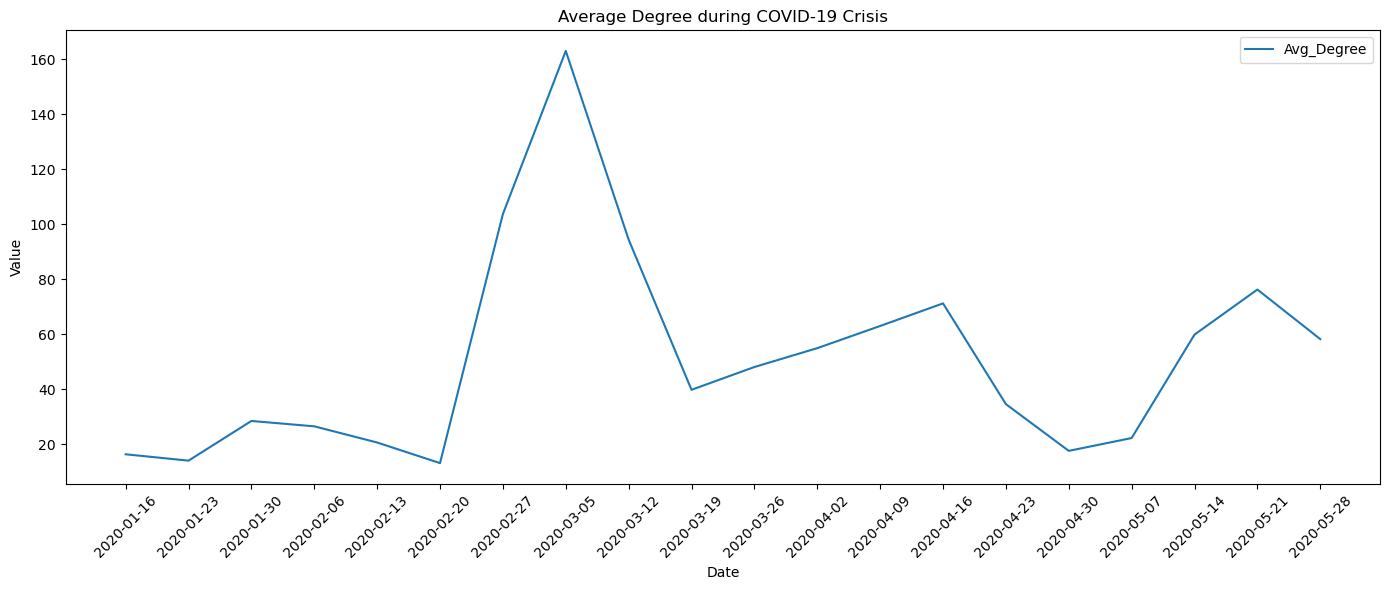

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=centrality_df_covid.set_index("Date")[["Avg_Degree"]])
plt.title("Average Degree during COVID-19 Crisis") 
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

During periods of financial crisis or panic, investors tend to react similarly across the market, leading to high synchronization in asset price movements. This phenomenon is often referred to as "correlation breakdown".

In crisis periods, investors dump risky assets en masse and reallocate to safe-haven assets, creating strong positive or negative correlations between most assets.

This widespread co-movement of assets results in higher correlation values across the borad, with a consequent higher density.

Also, when many assets simultaneously move in the same direction, stocks show an high correlation, leading to closed triangles in the network, which implies a peak in the clustering coefficient.



911 Crisis

In [19]:
df_911 = get_sp500_stocks("2001-05-01", "2002-01-01")
windows = rolling_time_windows("2001-05-01", "2002-01-01", window_size_days=15, step_days=7)
centrality_df_911 = compute_centralities_over_time(df_911, windows, threshold=0.7)

[*********************100%***********************]  501 of 502 completed

128 Failed downloads:
['MA', 'BLDR', 'WYNN', 'NWS', 'ZTS', 'EPAM', 'GDDY', 'CF', 'FOX', 'CZR', 'GNRC', 'BR', 'DAL', 'HLT', 'TDG', 'ANET', 'CFG', 'DAY', 'WBD', 'CTVA', 'TMUS', 'CRWD', 'VICI', 'ALLE', 'IQV', 'SYF', 'EXR', 'DG', 'UBER', 'APO', 'DPZ', 'PAYC', 'V', 'FTV', 'XYL', 'CPAY', 'HII', 'AMP', 'TRGP', 'GOOG', 'LYB', 'DXCM', 'TEL', 'INVH', 'VRSK', 'ENPH', 'PSX', 'LW', 'DLR', 'SMCI', 'BX', 'OTIS', 'GEV', 'LVS', 'CDW', 'PLTR', 'MPC', 'ULTA', 'FTNT', 'MSCI', 'NXPI', 'NFLX', 'LDOS', 'STX', 'MKTX', 'HWM', 'FOXA', 'EXE', 'ICE', 'CBOE', 'NCLH', 'MPWR', 'PANW', 'FSLR', 'NRG', 'LYV', 'VLTO', 'DASH', 'KEYS', 'GEHC', 'WDAY', 'CMG', 'ABBV', 'MOH', 'TSLA', 'NOW', 'IR', 'LULU', 'AWK', 'CARR', 'MRNA', 'KVUE', 'PM', 'APTV', 'DELL', 'PODD', 'PARA', 'SOLV', 'DOW', 'ABNB', 'FANG', 'AMCR', 'CHTR', 'SW', 'CBRE', 'CEG', 'AVGO', 'LKQ', 'NDAQ', 'HPE', 'PYPL', 'UAL', 'KHC', 'GOOGL', 'VST', 'HCA', 'NWSA', 'AIZ', 'GM', 'KKR', 'KDP', 'KMI'

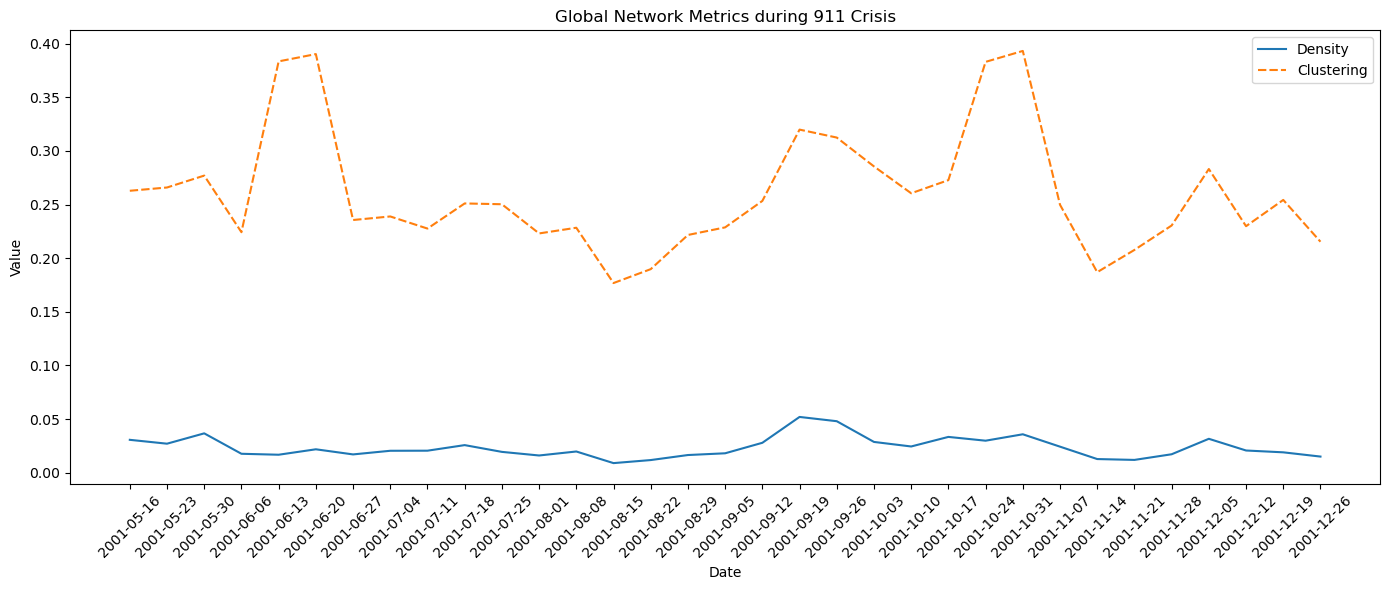

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.lineplot(data=centrality_df_911.set_index("Date")[["Density", "Clustering"]])
plt.title("Global Network Metrics during 911 Crisis") 
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2008 Financial Crisis

In [23]:
df_2008 = get_sp500_stocks("2008-06-01", "2008-12-01")
windows = rolling_time_windows("2008-06-01", "2008-12-01", window_size_days=15, step_days=7)
centrality_df_2008 = compute_centralities_over_time(df_2008, windows, threshold=0.7)

[*********************100%***********************]  502 of 502 completed

81 Failed downloads:
['NWS', 'LW', 'EPAM', 'GNRC', 'GDDY', 'AMCR', 'CZR', 'HLT', 'ANET', 'CFG', 'DAY', 'CTVA', 'VICI', 'CRWD', 'ALLE', 'SYF', 'IQV', 'DG', 'APO', 'UBER', 'PAYC', 'FTV', 'CPAY', 'XYL', 'HII', 'TRGP', 'LYB', 'INVH', 'ENPH', 'VRSK', 'PSX', 'GEV', 'OTIS', 'CDW', 'MPC', 'PLTR', 'ZTS', 'FTNT', 'NXPI', 'HWM', 'FOXA', 'EXE', 'CBOE', 'NCLH', 'PANW', 'VLTO', 'DASH', 'GEHC', 'KEYS', 'ABBV', 'WDAY', 'NOW', 'TSLA', 'IR', 'CARR', 'KVUE', 'MRNA', 'DELL', 'APTV', 'DOW', 'SOLV', 'ABNB', 'FANG', 'CHTR', 'SW', 'CEG', 'AVGO', 'HPE', 'PYPL', 'KHC', 'VST', 'HCA', 'NWSA', 'FOX', 'GM', 'KKR', 'KMI', 'META']: YFPricesMissingError('possibly delisted; no price data found  (1d 2008-06-01 -> 2008-12-01) (Yahoo error = "Data doesn\'t exist for startDate = 1212292800, endDate = 1228107600")')
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
['BF.B']: YFPricesMissingError('possibly delisted; no price data foun

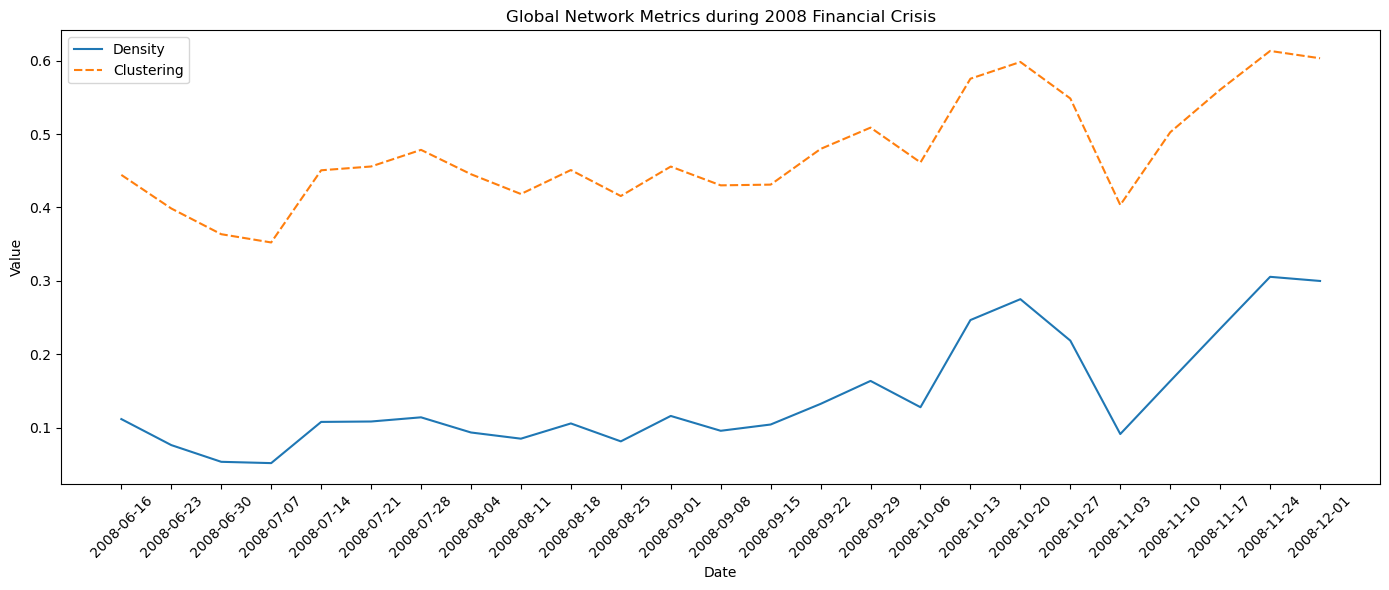

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.lineplot(data=centrality_df_2008.set_index("Date")[["Density", "Clustering"]])
plt.title("Global Network Metrics during 2008 Financial Crisis") 
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The network density reflects the overall level of interconnectedness—remains relatively low through the summer months but begins to rise sharply in late September and peaks between mid-October and mid-November. This period coincides with some of the most critical moments of the crisis, including the bankruptcy of Lehman Brothers and several major international interventions. The spike in density suggests that financial entities became significantly more correlated during this time, possibly due to widespread systemic stress and synchronized market behavior.

Russia-Ucraine War

In [25]:
df_war = get_sp500_stocks("2021-12-01", "2022-04-01")
windows = rolling_time_windows("2021-12-01", "2022-04-01", window_size_days=15, step_days=7)
centrality_df_war = compute_centralities_over_time(df_war, windows, threshold=0.7)

[*********************100%***********************]  502 of 502 completed

8 Failed downloads:
['GEV', 'VLTO', 'GEHC', 'KVUE', 'SOLV', 'SW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-12-01 -> 2022-04-01) (Yahoo error = "Data doesn\'t exist for startDate = 1638334800, endDate = 1648785600")')
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-12-01 -> 2022-04-01)')


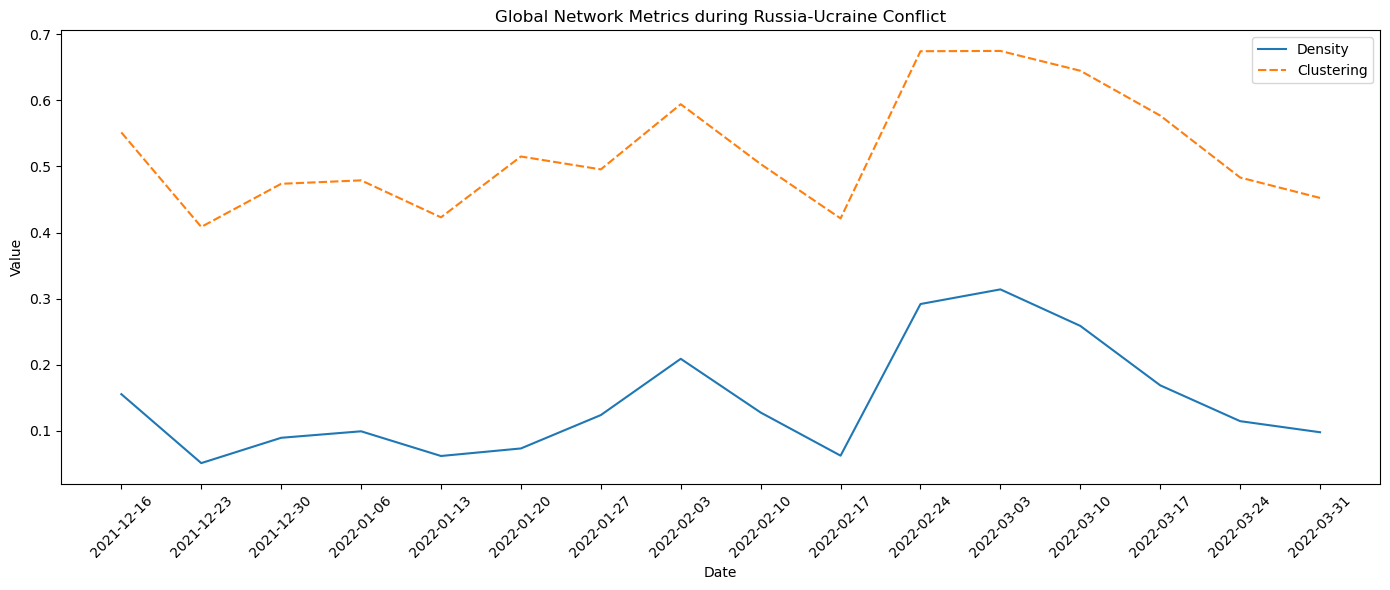

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.lineplot(data=centrality_df_war.set_index("Date")[["Density", "Clustering"]])
plt.title("Global Network Metrics during Russia-Ucraine Conflict") 
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()